# 1. Random walk in 1 dimensional space

case: 오른쪽으로 갈 확률과 왼쪽으로 갈 확률이 반반 같다. $P(\rightarrow)=P(\leftarrow)=1/2 \,(p=q=1/2)$

(책 7~8쪽) 오른쪽 걸음 수를 $n_{1}$, 왼쪽 걸음 수를 $n_{2}$라고 하면, 총 걸음 수는 $N=n_{1}+n_{2}$이고, 알짜 걸음 수는 $m\equiv n_{1}-n_{2}$이다.

$<N>=<n_{1}+n_{2}>=<n_{1}>+<n_{2}>=pN+qN=(p+q)N=N$

$<m>=<n_{1}-n_{2}>=<n_{1}>-<n_{2}>=pN-qN=(p-q)N$

한편, $m=n_{1}-n_{2}=2n_{1}-N$ 이므로, 

$\Delta m\equiv m-<m>=(2n_{1}-N)-(2<n_{1}>-N)$

$=2(n_{1}-<n_{1}>$

$=2 \Delta n_{1}$

$<(\Delta m)^{2}>=4<(\Delta n_{1})^{2}>=4pqN=4(1/2)(1/2)N=N$

$\therefore \, <(\Delta m)^{2}>^{1/2}=N^{1/2}$

Python으로 구현하기 위해서 먼저 numpy 와 matplotlib.pyplot을 import하자. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm_notebook  #진행상황을 보여주는 창인데 필요없다. 깃헙창에서는 안보임

numpy의 random package에서 binomial distribution을 구현할 수 있다. 

In [91]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.
print(s) #나오는 숫자들은 동전을 10번 던져서 나오는 앞면의 개수(혹은 뒷면의 개수)

[4 4 6 8 4 7 8 4 4 7 4 6 3 3 4 4 8 4 6 6 7 4 7 1 4 3 4 2 7 3 7 4 4 3 6 3 5
 7 8 5 6 6 8 4 7 6 7 6 8 7 7 3 4 4 5 6 4 6 2 5 4 5 3 4 4 3 6 9 4 7 3 4 4 9
 5 6 5 6 6 6 3 4 4 2 4 3 6 4 5 5 1 6 4 1 5 2 6 5 5 7 3 5 5 6 5 7 4 4 4 0 6
 6 6 7 5 3 8 2 6 5 5 6 4 4 8 5 4 1 5 3 3 3 5 5 3 7 6 3 6 7 5 6 3 4 5 5 4 4
 6 6 6 4 6 8 7 6 6 3 4 3 7 4 5 5 4 2 2 6 5 3 5 3 5 5 6 5 5 4 3 5 6 6 5 5 5
 5 6 7 6 7 8 4 6 6 4 3 6 6 5 8 5 7 5 6 7 5 7 4 6 4 6 6 3 3 5 5 4 4 3 4 7 4
 2 1 5 2 4 7 5 4 4 5 2 4 6 6 5 6 5 6 5 6 7 4 5 5 4 3 9 8 4 6 5 4 4 5 4 6 4
 7 5 4 6 4 5 5 5 3 2 6 3 2 4 7 6 4 4 5 4 6 3 6 5 5 3 5 3 6 5 7 5 5 6 4 5 3
 7 4 4 5 7 4 5 7 3 6 4 2 2 3 6 6 6 7 3 5 3 1 7 3 7 7 7 5 5 3 4 2 3 2 5 4 5
 2 4 6 6 4 6 3 3 5 5 6 5 4 5 6 5 6 6 5 4 6 7 7 3 5 6 6 5 2 2 2 6 5 4 7 7 4
 6 2 2 7 6 5 3 5 4 5 5 3 5 4 5 5 3 4 3 5 4 4 4 2 3 7 6 5 4 3 6 5 5 8 4 5 3
 4 6 4 6 5 7 4 9 6 3 6 5 5 4 5 4 3 1 6 5 4 3 4 6 4 6 4 4 5 5 5 5 4 5 7 7 3
 5 5 7 5 4 1 5 5 4 7 4 5 4 5 2 3 3 5 5 4 4 2 2 7 6 5 3 3 8 3 8 4 6 6 5 4 2
 1 4 6 6 6 8 7 6 6 4 5 5 

이제 step의 개수가 10일때를 보자.(origin:0)

P((-10))= 0.00111
P((-8))= 0.00988
P((-6))= 0.04281
P((-4))= 0.11636
P((-2))= 0.20395
P((0))= 0.2477
P((2))= 0.20434
P((4))= 0.1189
P((6))= 0.04403
P((8))= 0.00989
P((10))= 0.00103



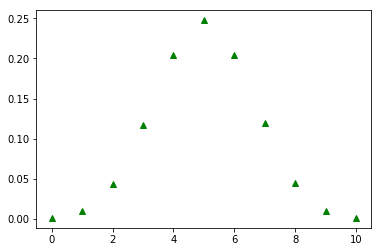

In [118]:
n,p=10,.5
s1=np.random.binomial(n,p,100000) #숫자 100000이 들어간 부분은 100000번 반복했다는 뜻-> 신뢰도가 높아짐
px1=[]
py1=[]
Displacement=0
for i in range(n+1):
    print("P((%d))="%(i+(-1)*(10-i)),sum(s1==i)/100000)   #i는 오른쪽(+1)으로 이동한 step의 수! 즉 (10-i)는 왼쪽(-1)으로 이동한 수
    px1.append(i)
    py1.append(sum(s1==i)/100000)
    Displacement+=sqrt((i+(-1)*(10-i))**2)*(sum(s1==i)/100000)
print()

plt.plot(px1,py1,'g^')
plt.show()

앞에서 정의해 놓은 displacement는 최종 변위값의 기댓값이다.

In [9]:
print(Displacement)

2.4569799999999997


아예 Dist 함수를 만들자

In [10]:
def Dist(t):
    s=np.random.binomial(t,p,100000)
    Displacement=0
    for j in range(t+1):
        Displacement+=sqrt((j+(-1)*(t-j))**2)*(sum(s==j)/100000)
        
    return Displacement

In [11]:
Dist(10)

2.4607999999999994

HBox(children=(IntProgress(value=0, max=31), HTML(value='')))

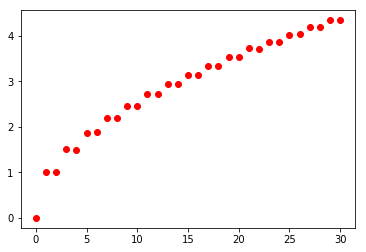

In [17]:
px=[]
py=[]
total=tqdm_notebook(range(31))
for xx in total:
    px.append(xx)
    py.append(Dist(xx))
    
plt.plot(px,py,'ro')
plt.show()

logscale로 그려보자.

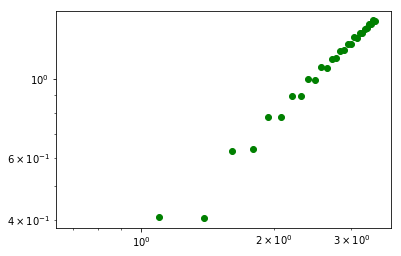

In [36]:
from math import log

lnpx=[]
lnpy=[]
for k in range(30):
    lnpx.append(log(px[k+1]))
    lnpy.append(log(py[k+1]))
    
plt.plot(px,py,'go')
plt.xscale('log')
plt.yscale('log')
plt.show()

이제 model fitting을 위해서 scipy.optimize package에서 curve_fit을 import하자

In [37]:
from scipy.optimize import curve_fit

curve_fit을 직접 적용하기 전에 linear model인 func를 하나 정의하자!

In [38]:
def func(x,a,b):
    return a*x+b

이제 본격적으로 fitting해보자!

In [77]:
popt, pcov = curve_fit(func, lnpx, lnpy)
print(popt) # (a,b)값을 반환해줌!
print("Best fit: (%f)x+(%f)"%(popt[0],popt[1]))
print()
print(pcov) #신뢰도를 보여줌(variance)

[ 0.48000459 -0.17051261]
Best fit: (0.480005)x+(-0.170513)

[[ 0.00013446 -0.00033461]
 [-0.00033461  0.00092672]]


$ln(r) \sim 0.5 ln(t) \longrightarrow r \sim t^{1/2}$

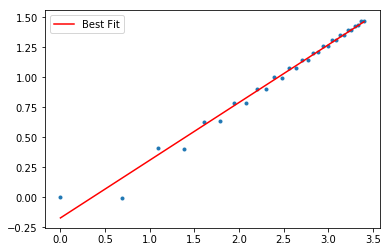

In [76]:
fittedpy=[]
for i in range(len(lnpx)):
    fittedpy.append(func(lnpx[i],popt[0],popt[1]))

plt.scatter(lnpx, lnpy, marker='.')
plt.plot(lnpx,fittedpy,color='red')
plt.legend(['Best Fit'], loc=2)
plt.show()

Good! $\,$ $ln(t)$가 증가할수록 잘 맞는다.

# 2. Random walk in 2 dimensional space

2차원에서 선택할 수 있는 가짓수는 위, 아래, 왼쪽, 오른쪽 4가지다. $\rightarrow$ multinomial distribution을 도입해야한다.

case: $p(\uparrow)=q(\downarrow)=r(\rightarrow)=s(\leftarrow)=1/4$ : multinomial expansion $(p+q+r+s)^{N}$

역시 numpy의 random package에서 multinomial distribution을 구현할 수 있다.

In [89]:
np.random.multinomial(100, [1/4.]*4) #100번 선택해서 각각 방향으로 갈 경우의 수

array([27, 20, 30, 23])

앞에서처럼 먼저 step의 수가 10일 때를 보자 (순서대로 위/아래/오른쪽/왼쪽)

In [95]:
s2=np.random.multinomial(10,[1/4.]*4,size=100)
print(s2)

[[1 1 5 3]
 [2 3 1 4]
 [5 2 2 1]
 [3 3 3 1]
 [4 3 1 2]
 [3 1 4 2]
 [5 2 0 3]
 [2 3 2 3]
 [4 1 3 2]
 [2 2 5 1]
 [2 3 2 3]
 [2 1 3 4]
 [2 6 1 1]
 [3 1 4 2]
 [4 1 3 2]
 [6 3 0 1]
 [2 1 2 5]
 [3 2 1 4]
 [2 5 3 0]
 [1 5 2 2]
 [2 4 3 1]
 [2 3 2 3]
 [1 4 3 2]
 [1 4 3 2]
 [3 3 1 3]
 [0 3 5 2]
 [4 0 4 2]
 [2 3 2 3]
 [2 2 3 3]
 [3 1 1 5]
 [2 1 5 2]
 [3 1 2 4]
 [2 4 1 3]
 [2 2 4 2]
 [2 1 4 3]
 [1 3 3 3]
 [3 1 3 3]
 [5 3 1 1]
 [3 1 5 1]
 [5 3 2 0]
 [5 3 2 0]
 [1 3 3 3]
 [4 2 2 2]
 [3 2 3 2]
 [3 1 4 2]
 [1 4 0 5]
 [1 2 4 3]
 [1 3 4 2]
 [4 1 2 3]
 [3 1 4 2]
 [3 3 1 3]
 [4 3 1 2]
 [3 3 2 2]
 [4 3 1 2]
 [3 2 1 4]
 [0 2 3 5]
 [5 2 2 1]
 [3 3 3 1]
 [3 3 2 2]
 [3 0 0 7]
 [2 2 4 2]
 [2 5 2 1]
 [2 3 2 3]
 [0 3 0 7]
 [1 2 3 4]
 [2 2 1 5]
 [3 2 2 3]
 [2 5 1 2]
 [1 5 3 1]
 [3 2 3 2]
 [3 3 2 2]
 [2 2 6 0]
 [2 2 3 3]
 [2 1 5 2]
 [2 2 4 2]
 [1 2 5 2]
 [6 3 1 0]
 [1 3 2 4]
 [1 5 2 2]
 [1 2 1 6]
 [0 4 2 4]
 [2 2 3 3]
 [4 4 1 1]
 [3 3 2 2]
 [2 2 2 4]
 [2 3 3 2]
 [4 1 3 2]
 [1 2 4 3]
 [0 6 3 1]
 [4 0 4 2]
 [2 3 3 2]

각각의 행들은 (위, 아래, 오른쪽, 왼쪽)을 나타내며 이것이 총 100번(len(s2)번)이루어졌음을 뜻한다. 따라서 총 움직인거리를 100으로 나누면 평균적인 변위를 얻을 수 있다. 다음은 step수가 10일 때 변위를 구한 것이다.

In [105]:
dist=0 #변위
for i in range(len(s2)):
    dist+=sqrt((s2[i,1]-s2[i,0])**2+(s2[i,2]-s2[i,3])**2)/len(s2) #Euclidean displacement

print(dist)

2.706614479096395


신뢰도를 높이기 위해 experiments수를 늘리고 Dist2d()함수를 정의하자

In [108]:
experiments=10000

def Dist2d(t):
    s=np.random.multinomial(t,[1/4.]*4,experiments)
    Displacement=0
    for j in range(len(s)):
        Displacement+=sqrt((s[j,1]-s[j,0])**2+(s[j,2]-s[j,3])**2)/len(s) #Euclidean displacement
        
    return Displacement

In [109]:
Dist2d(10)

2.827002553913934

위에서와 똑같이 하면 된다.

HBox(children=(IntProgress(value=0), HTML(value='')))

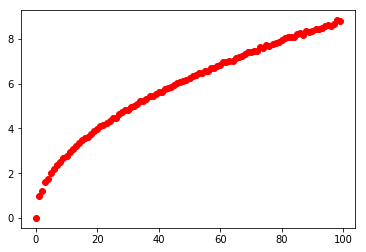

In [116]:
px2d=[]
py2d=[]
total=tqdm_notebook(range(100))
for xx in total:
    px2d.append(xx)
    py2d.append(Dist2d(xx))
    
plt.plot(px2d,py2d,'ro')
plt.show()

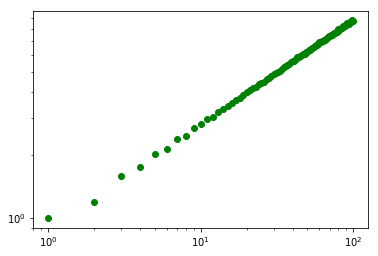

In [117]:
plt.plot(px,py,'go')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [115]:
lnpx2d=[]
lnpy2d=[]
for k in range(99):
    lnpx2d.append(log(px[k+1]))
    lnpy2d.append(log(py[k+1]))
    
popt2d, pcov2d = curve_fit(func, lnpx2d, lnpy2d)
print(popt2d) # (a,b)값을 반환해줌!
print("Best fit: (%f)x+(%f)"%(popt2d[0],popt2d[1]))
print()
print(pcov2d) #신뢰도를 보여줌(variance)

[ 0.49507042 -0.10072386]
Best fit: (0.495070)x+(-0.100724)

[[ 2.36710546e-06 -8.58695479e-06]
 [-8.58695479e-06  3.31663194e-05]]


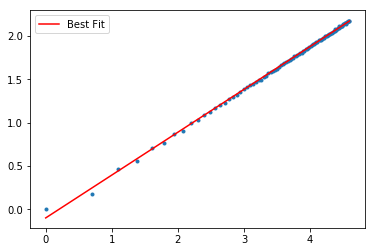

In [119]:
fittedpy2d=[]
for i in range(len(lnpx2d)):
    fittedpy2d.append(func(lnpx2d[i],popt2d[0],popt2d[1]))

plt.scatter(lnpx2d, lnpy2d, marker='.')
plt.plot(lnpx2d,fittedpy2d,color='red')
plt.legend(['Best Fit'], loc=2)
plt.show()

$ln(r) \sim 0.5 ln(t) \longrightarrow r \sim t^{1/2}$